# BSc Thesis: ML Applications in Real Estate (Draft)

### Table of Contents:


### 1.Introduction

#### 1.1 Dataset
The OECD, IMF and BIS data may be employed for high frequency aggregate data
(quarterly) – available over shorter periods of time. National statistical agencies may
potentially offer regional economic variables (GPD, employment and unemployment,
etc) as well as regional real estate indices.
For longer time series, the Jordà-Schularick-Taylor Macrohistory Database available at
http://www.macrohistory.net/data/ contains yearly data of 17 advanced economies
since 1870 with 45 real and nominal variables. Among them house equity and bond
prices mortgage, general credit, gdp, inflation. 

#### 1.1.2 OECD 
1) [Affordable Housing Database](https://www.oecd.org/housing/data/affordable-housing-database/housing-market.htm)
2) [House Prices Data](https://stats.oecd.org/Index.aspx?DataSetCode=HOUSE_PRICES)



#### 1.1.3 Macro Database
1) [Macro Database](http://www.macrohistory.net/data/)



#### 1.1.4 IMF
1) [IMF Housing Data](https://www.imf.org/external/research/housing/index.htm)



#### 1.1.5 BIS

1) [BIS Data](https://www.bis.org/statistics/pp_selected.htm)



#### 1.1.6 Alternative Data
  - Real Estate Related search terms
    - Google Trends

    - Twitter Trends
  
  - Satelite Imagery for Segmentation:
    - Sentinel-2 
      - Free
      - Up to 10m 
      - RGB + Near Infra

    - Google Earth
      - Free
      - Satelite, Address, Street-view etc..

#### 1.7 Research Question
Are there benefits in forecasting real estate variables using machine learning
techniques? If yes, at what frequencies {monthly, quarterly, yearly} and over which
forecasting period?


#### Slots
A. Moving beyond linear models in real estate valuation and forecasting. Role
and magnitude of non-linearities.
  

B. Uncovering causal mechanisms linking determinants to real estate values.


C. Detecting over/undervaluation tools using ML.


D. Forecasting real estate prices using big data: methods and alternative data
sources (using Google Trends, segmented satellite imagery, social media)


E. Requires Regional/City-level data: uncovering regional determinants of
house prices and rents
- Can be done with Airbnb Dataset, CB dataset

### Research Ideas

Output: real estate prices

Input:
Macro score

Alternative Data

- Noise Pollution
  - Multiple sites with city maps
- Landsat Imagery
  - USGS Earth Explorer
- Google Trends (Regional)
  - API

### TASK: Multivariate time-series forecasting (with ensemble?)

In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import seaborn as sns


### Data

In [3]:
def create_html_table(string):
    print("|Variable|Label|\n|---|---|")
    for string in string.split('\n'):
        print("|"+string.split(' ')[0]+"|"+str(" ".join([string.split(" ")[i] for i in range(1,len(string.split(' ')))]))+"|")    
        
# create_html_table(string)

|Variable|Label|
|---|---|
|Variable|Label|
|year|Year|
|country|Country|
|iso|ISO 3-letter code|
|ifs|IFS 3-number country-code|
|pop|Population|
|rgdpmad|Real GDP per capita (PPP, 1990 Int$, Maddison)|
|rgdbarro|Real GDP per capita (index, 2005=100)|
|rconsbarro|Real consumption per capita (index, 2006=100)|
|gdp|GDP (nominal, local currency)|
|iy|Investment-to-GDP ratio|
|cpi|Consumer prices (index, 1990=100)|
|ca|Current account (nominal, local currency)|
|imports|Imports (nominal, local currency)|
|exports|Exports (nominal, local currency)|
|narrowm|Narrow money (nominal, local currency)|
|money|Broad money (nominal, local currency)|
|stir|Short-term interest rate (nominal, percent per year)|
|ltrate|Long-term interest rate (nominal, percent per year)|
|hpnom|House prices (nominal index, 1990=100)|
|unemp|Unemployment rate (percent)|
|wage|Wages (index, 1990= 100)|
|debtgdp|Public debt-to-GDP ratio|
|revenue|Government revenues (nominal, local currency)|
|expenditure|Government expenditure (nominal, local currency)|
|xrusd|USD exchange rate (local currency/USD)|
|peg|Peg dummy|
|peg_strict|Strict peg dummy|
|crisisJST|Systemic financial crises (0-1 dummy); included since R5|
|crisisJST_old|Systemic financial crises (0-1 dummy); as coded in all prior releases (R1 – R4)|
|JSTtrilemmaIV|JST trilemma instrument (raw base rate changes)|
|tloans|Total loans to non-financial private sector (nominal, local currency)|
|tmort|Mortgage loans to non-financial private sector (nominal, local currency)|
|thh|Total loans to households (nominal, local currency)|
|tbus|Total loans to business (nominal, local currency)|
|bdebt|Corporate debt (nominal, local currency)|
|peg_type|Peg type (BASE, PEG, FLOAT)|
|peg_base|Peg base (GBR, USA, DEU, HYBRID, NA)|
|eq_tr|Equity total return, nominal. r[t] = [[p[t] + d[t]] / p[t-1] ] - 1|
|housing_tr|Housing total return, nominal. r[t] = [[p[t] + d[t]] / p[t-1] ] - 1|
|bond_tr|Government bond total return, nominal. r[t] = [[p[t] + coupon[t]] / p[t-1] ] - 1|
|bill_rate|Bill rate, nominal. r[t] = coupon[t] / p[t-1]|
|rent_ipolated|1 if housing rental yields interpolated e.g. wartime|
|housing_capgain_ipolated1|if housing capital gains and total returns interpolated e.g. wartime|
|housing_capgain|Housing capital gain, nominal. cg[t] = [ p[t] / p[t-1] ] - 1|
|housing_rent_rtn|Housing rental return. dp_rtn[t] = rent[t]/p[t-1]|
|housing_rent_yd|Housing rental yield. dp[t] = rent[t]/p[t]|
|eq_capgain|Equity capital gain, nominal. cg[t] = [ p[t] / p[t-1] ] - 1|
|eq_dp|Equity dividend yield. dp[t] = dividend[t]/p[t]|
|eq_capgain_interp|1 if equity cap. gain interpolated to cover exchange closure|
|eq_tr_interp|1 if equity total return interpolated to cover exchange closure|
|eq_dp_interp|1 if equity dividend interpolated or assumed zero to cover exchange closure|
|bond_rate|Gov. bond rate, rate[t] = coupon[t] / p[t-1], or yield to maturity at t|
|eq_div_rtn|Equity dividend return. dp_rtn[t] = dividend[t]/p[t-1]|
|capital_tr|Tot. rtn. on wealth, nominal. Wtd. avg. of housing, equity, bonds and bills|
|risky_tr|Tot. rtn. on risky assets, nominal. Wtd. avg. of housing and equity|
|safe_tr|Tot. rtn. on safe assets, nominal. Equally wtd. avg. of bonds and bills|
|lev|Banks, capital ratio (in %)|
|ltd|Banks, loans-to-deposits ratio (in %)|
|noncore|Banks, noncore funding ratio (in %)|

In [4]:
PATH = "data//"

df_jst = pd.read_excel(PATH+"JSTdatasetR6.xlsx")
# print(df_jst.groupby("country").mean())

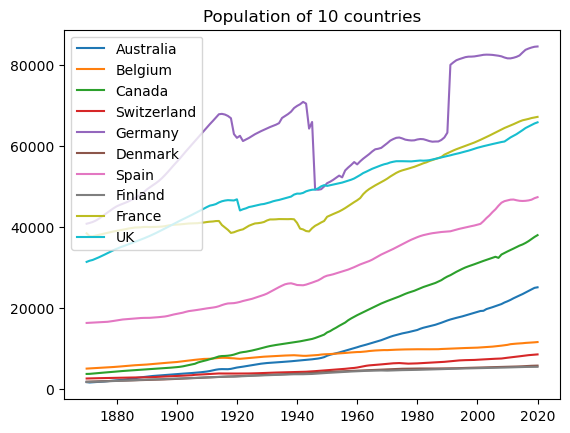

In [6]:
labels = []
for country in df_jst.country.unique()[:10]:
    
    country_df = df_jst.loc[df_jst.country==country]
    plt.plot(country_df["year"],country_df["pop"])
    labels.append(country)
plt.title("Population of 10 countries")
plt.legend(labels)

### Missing Values

housing_capgain_ipolated    2713
eq_dp_interp                2712
eq_tr_interp                2711
eq_capgain_interp           2711
rent_ipolated               2689
tbus                        1419
thh                         1344
capital_tr                   888
risky_tr                     864
bdebt                        853
housing_rent_rtn             809
housing_tr                   809
housing_rent_yd              797
unemp                        769
housing_capgain              673
hpnom                        668
JSTtrilemmaIV                645
eq_div_rtn                   555
eq_dp                        549
eq_capgain                   548
noncore                      488
safe_tr                      471
eq_tr                        455
bond_tr                      423
ltd                          419
tmort                        406
bill_rate                    367
lev                          365
bond_rate                    337
iy                           293
peg_base  

C:\Users\nemet\AppData\Local\Temp\ipykernel_17836\4142382279.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(i*100))+"%" for i in np.arange(0,1.1,0.1)]);


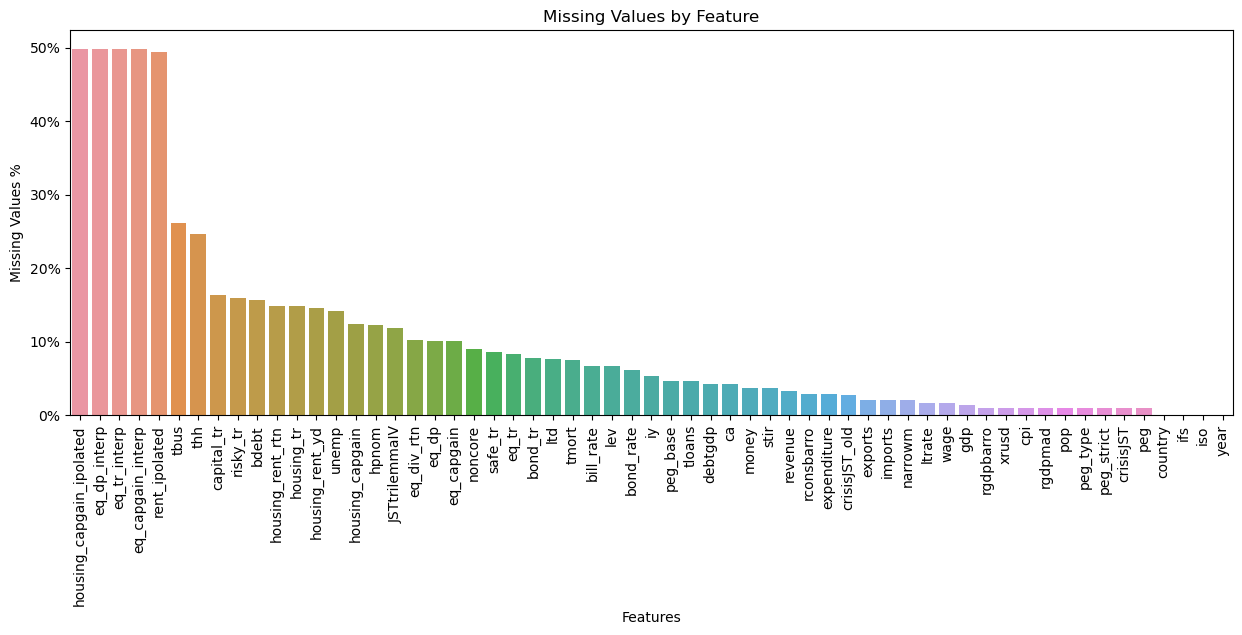

In [18]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
is_null_df = df_jst.isnull().sum().sort_values(ascending=False)
print(is_null_df)
ax =sns.barplot(x=is_null_df.index,y=is_null_df.values/len(df_jst))
ax.set_title("Missing Values by Feature")

ax.set_ylabel("Missing Values %")

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("Features")
ax.set_yticklabels([str(int(i*100))+"%" for i in np.arange(0,1.1,0.1)]);


### Models

#### State of the art:

- ARIMA
- NBEATS
- PROPHET


#### Advanced Regression

- Lasso
- Ridge
- RF
- XGBoost


#### Black-box Standard
- CNN
- LSTM
  

### References